# **Import Libraries**

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# **Data Preprocessing**

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [9]:
# 1. Basic Information
print("1. Basic Information:")
print(df.info())
print("\n" + "="*80 + "\n")

# 2. Descriptive Statistics
print("2. Descriptive Statistics:")
print(df.describe())
print("\n" + "="*80 + "\n")

# 3. Unique Values Count
print("3. Unique Values Count:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
print("\n" + "="*80 + "\n")

# 4. Target Variable Distribution
print("4. Target Variable Distribution:")
print(df['diagnosis'].value_counts())

'''
Diagnosis:
- B (Benign)
- M (Malignant) [Cancer]
'''


1. Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri

In [3]:
# Drop ID column
df = df.drop(columns=['id', 'Unnamed: 32'])

# Encode target 'diagnosis' column
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

# Seperate features ad target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Scale the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


# **Data Splitting**

In [4]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Printing the sizes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (455, 30)
y_train shape: (455,)
X_test shape: (114, 30)
y_test shape: (114,)


# **Model Selection and Training**

## **Ensemble Learning**

**Base Models:** The primary classifiers that are trained on the original dataset. In this scenario, the base models are Random Forest, XGBoost, and SVM. Each of these models will make predictions based on the original features of the dataset.

**Meta-Model:** After the base models make their predictions, they are combined to produce a final single prediction for each instance in the dataset. Logistic Regression is used as the meta-model.

*The meta-model is trained on a new dataset where:*
* The features (meta-features) are the predictions made by the base models.
* The target variable remains the same.
* The role of the meta-model is to learn the best way to combine the predictions of the base models.

In [8]:
# Validation set generates meta-features for the meta model
X_train_base, X_val, y_train_base, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

'''Base Models'''
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_base, y_train_base)

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_base, y_train_base)

# Support Vector Machine 
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_base, y_train_base)


SVC(probability=True, random_state=42)

In [14]:
'''Generate Meta-Features'''
# Use the trained base models to make predictions on the validation set. 

rf_preds_val = rf.predict_proba(X_val)[:, 1]  # Predictions from Random Forest
xgb_preds_val = xgb_model.predict_proba(X_val)[:, 1]  # Predictions from XGBoost
svc_preds_val = svc.predict_proba(X_val)[:, 1]  # Predictions from SVM

# Combine the predictions from the three models to create a new feature set for the validation set
stacked_features_val = np.column_stack((rf_preds_val, xgb_preds_val, svc_preds_val))


In [15]:
'''Train Meta-Model'''
# Logistic Regression meta-model will learn to make final predictions based on the outputs of the base models.
meta_model = LogisticRegression()
meta_model.fit(stacked_features_val, y_val)

LogisticRegression()

In [16]:
'''Make Predictions using Stacking Ensemble'''
# For any new data, first get the predictions from the base models then use the meta-model to produce the final predictions.

# Get predictions from base models for the test set
rf_preds_test = rf.predict_proba(X_test)[:, 1]
xgb_preds_test = xgb_model.predict_proba(X_test)[:, 1]
svc_preds_test = svc.predict_proba(X_test)[:, 1]

# Stack these predictions to create meta-features for the test set
stacked_features_test = np.column_stack((rf_preds_test, xgb_preds_test, svc_preds_test))

# Get final predictions from the meta-model
stacked_preds = meta_model.predict(stacked_features_test)

# **Evaluation and Testing**

In [17]:
# Evaluate the performance of the stacking ensemble on the test set
accuracy = accuracy_score(y_test, stacked_preds)
print(f"Stacking Ensemble Test Accuracy: {accuracy:.4f}")

Stacking Ensemble Test Accuracy: 0.9649


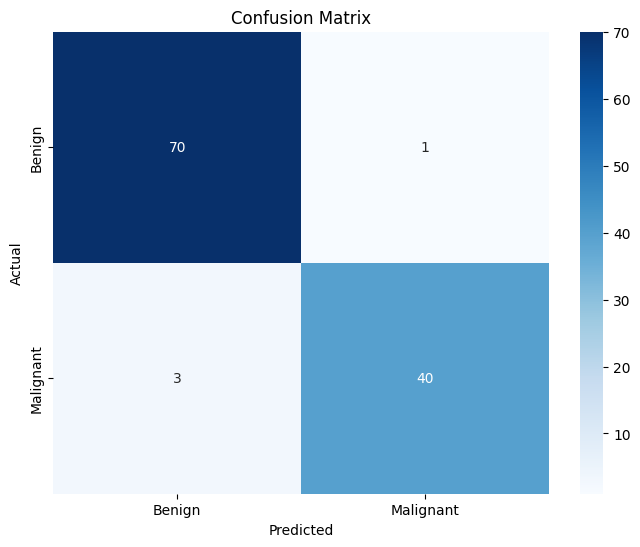

{'Precision': 0.975609756097561,
 'Recall': 0.9302325581395349,
 'F1-Score': 0.9523809523809524,
 'AUC-ROC': 0.9580740255486406}

In [19]:
# Calculate metrics
precision = precision_score(y_test, stacked_preds)
recall = recall_score(y_test, stacked_preds)
f1 = f1_score(y_test, stacked_preds)
roc_auc = roc_auc_score(y_test, stacked_preds)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, stacked_preds)

metrics_dict = {
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC-ROC": roc_auc
}

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

metrics_dict

## **Save and Load Model**

In [20]:
import joblib

# Save the base models
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')
joblib.dump(svc, 'svm_model.pkl')

# Save the meta-model
joblib.dump(meta_model, 'meta_model_logistic_regression.pkl')


['meta_model_logistic_regression.pkl']

In [21]:
# Load the base models
rf_loaded = joblib.load('random_forest_model.pkl')
xgb_model_loaded = joblib.load('xgboost_model.pkl')
svc_loaded = joblib.load('svm_model.pkl')

# Load the meta-model
meta_model_loaded = joblib.load('meta_model_logistic_regression.pkl')


In [34]:
'''Generate sample data'''
sample_data = np.random.rand(5, 30) # 30 features in dataset of 5 samples
feature_names = df.columns.drop('diagnosis')  
sample_data_df = pd.DataFrame(sample_data, columns=feature_names)
sample_data_scaled = scaler.transform(sample_data_df)
sample_data_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.685541,0.891504,0.339458,0.893082,0.599687,0.178047,0.058966,0.884051,0.140908,0.266396,...,0.577878,0.829198,0.937367,0.611280,0.788738,0.187523,0.312299,0.859773,0.639488,0.749377
1,0.502814,0.407808,0.927105,0.871843,0.454187,0.993462,0.929207,0.295438,0.842506,0.249154,...,0.675387,0.437252,0.993696,0.392271,0.827467,0.664716,0.130882,0.561875,0.411912,0.810159
2,0.984170,0.986548,0.662135,0.101783,0.451179,0.090454,0.748407,0.713210,0.145544,0.535893,...,0.533419,0.168779,0.119591,0.731079,0.277607,0.933675,0.901982,0.256733,0.963644,0.856810
3,0.741752,0.095395,0.704809,0.806887,0.659105,0.052345,0.723090,0.705588,0.982928,0.875783,...,0.843413,0.909869,0.590699,0.000018,0.619214,0.274157,0.781436,0.800743,0.337266,0.865975
4,0.709809,0.143663,0.687515,0.615566,0.363842,0.810441,0.139080,0.520262,0.500809,0.962940,...,0.415447,0.630720,0.789060,0.699488,0.151617,0.494856,0.597633,0.867633,0.466831,0.256581


In [35]:
# Assuming sample_data is your new data for which you want predictions
# First, get predictions from the base models
rf_preds_sample = rf_loaded.predict_proba(sample_data)[:, 1]
xgb_preds_sample = xgb_model_loaded.predict_proba(sample_data)[:, 1]
svc_preds_sample = svc_loaded.predict_proba(sample_data)[:, 1]

# Stack these predictions to create meta-features for the sample data
stacked_features_sample = np.column_stack((rf_preds_sample, xgb_preds_sample, svc_preds_sample))

# Get final predictions from the loaded meta-model
final_predictions = meta_model_loaded.predict(stacked_features_sample)

# Convert predictions to user-friendly labels
labels = ["Benign", "Malignant"]
predictions_list = [labels[pred] for pred in final_predictions]

# Get the confidence scores (probabilities) from the meta-model
confidence_scores = meta_model_loaded.predict_proba(stacked_features_sample)[:, 1]

# Display predictions along with confidence scores
for i, (prediction, score) in enumerate(zip(predictions_list, confidence_scores)):
    print(f"Sample {i+1}:")
    print(f"Prediction: {prediction}")
    print(f"Confidence Score: {score:.2f}\n")

Sample 1:
Prediction: Malignant
Confidence Score: 0.93

Sample 2:
Prediction: Malignant
Confidence Score: 0.93

Sample 3:
Prediction: Malignant
Confidence Score: 0.91

Sample 4:
Prediction: Malignant
Confidence Score: 0.93

Sample 5:
Prediction: Malignant
Confidence Score: 0.93

